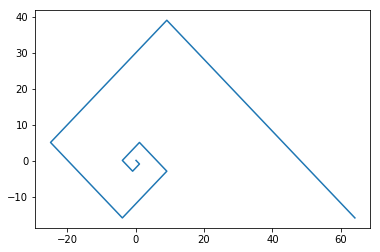

In [77]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
X = np.array([[0, 1], [1, 1]])
a,b=np.linalg.eig(X)
sumX = 0
sumY = 0
listX = []
listY = []
x = -1
y = 1
for i in range(N):
    F = b.dot(np.diag(a)**i).dot(np.linalg.inv(b))
    if(i%2 == 0):
        x = x * -1
    else:
        y = y * -1
    sumX = sumX + F[1][1]*x
    sumY = sumY + F[1][1]*y
    listX.append(sumX)
    listY.append(sumY)
    
plt.plot(listX, listY)
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
X = np.array([[0, 1], [1, 1]])
a,b=np.linalg.eig(X)
F = b.dot(np.diag(a)**N).dot(np.linalg.inv(b))
print(F)

[[  2.68638100e+208   4.34665577e+208]
 [  4.34665577e+208   7.03303677e+208]]


## 传统方法和特征值分解方法对比

In [10]:
import numpy as np
import matplotlib.pyplot as plt  

import time
def time_cost(f):
    def _f(*arg, **kwarg):
        start = time.clock()
        a=f(*arg,**kwarg)
        end = time.clock()
        print(f.__name__,"run cost time is ",end-start)
        return a
    return _f

@time_cost
def fib_opt_seq(seq):
    return [fib_opt(i) for i in seq]
    
def fib_opt(n):
    a,b,i=0,1,0
    
    while i<n:
        a,b=b,a+b
        i+=1
    else:
        return b    

@time_cost
def fib_eig_seq(seq):
    X = np.array([[0, 1], [1, 1]])
    a,b=np.linalg.eig(X)
    return [fib_eig(a, b, i) for i in seq]

def fib_eig(a, b, n):
    F = b.dot(np.diag(a)**n).dot(np.linalg.inv(b))
    return F[1][1]
    
import random
#seq = [random.randint(800,1000) for i in xrange(1000)]
seq = range(1000)

a=fib_opt_seq(seq)
print(a[len(seq)-1])
# write Your code fib_eig_seq function
b=fib_eig_seq(seq)
print(b[len(seq)-1])
print(b[len(seq)-1] - a[len(seq)-1])

fib_opt_seq run cost time is  0.26979681869313765
43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875
fib_eig_seq run cost time is  0.03385361816597765
4.34665576869e+208
1.4691058788743469e+195


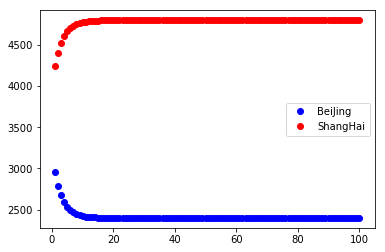

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
A = np.array([[3200, 4000]])
X = np.array([[0.8, 0.2], 
              [0.1, 0.9]])
listBJ = []
listSH = []
a,b=np.linalg.eig(X)
for i in range(N):
    F = b.dot(np.diag(a)**(i+1)).dot(np.linalg.inv(b))
    A2 = A.dot(F)
    listBJ.append(A2[0][0])
    listSH.append(A2[0][1])
listAxis = [i+1 for i in range(N)]
plt.plot(listAxis, listBJ, 'bo', label='BeiJing')
plt.plot(listAxis, listSH, 'ro', label='ShangHai')
plt.legend()
plt.show()